## Visualización COVID

Basado en el estudio de https://github.com/therealcyberlord

Analisis de los datos de la expansión del último coronavirus (SARS-CoV-2) llamado por la OMS oficialmente COVID-19, un virus respiratorio altamente contagioso que apareció en Wuhan en Diciembre del 2019. 

- Data: https://github.com/CSSEGISandData/COVID-19 Repositorio propiedad de Johns Hopkins..
- Enlace al artículo sobre el COVID-19 en la OMS  https://www.who.int/emergencies/diseases/novel-coronavirus-2019
- Enlace al artículo en el CDC https://www.cdc.gov/coronavirus/2019-ncov
- visualización de los datos con ARCGIS https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

<img src='https://newsfortomorrow.com/wp-content/uploads/2020/01/1578562454_Wuhan-pneumonia-New-coronavirus-related-to-SARS-idenitified.jpg'>

In [117]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.dates as mdates 
import pandas as pd 
import random
import math
import time
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline 

## Carga online de los datos
Los cargamos a partir del repositorio de Johns Hopkins en git

In [118]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [119]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030


### Gráfica con la evolución de contagios en un país específico

In [120]:
 np.sort(confirmed_df["Country/Region"].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland',
       'India', 'In

### Poner aquí abajo el pais elegido de la lista de arriba

In [121]:
pais_elegido = "Spain"

In [122]:
# Me quedo con las fechas nada mas, de la columna 4 en adelante. Las usaré de pie de gráficos por claridad
cols = confirmed_df.columns
col_fechas_ind = cols[4:]

#las paso a fecha
x_values = [datetime.datetime.strptime(d,"%m/%d/%y").date() for d in col_fechas_ind.values]

In [123]:
# chequeo Pais
esp_confirmed = confirmed_df[confirmed_df["Country/Region"]==pais_elegido].groupby("Country/Region").sum().loc[:, col_fechas_ind]
esp_confirmed_y = esp_confirmed.values[0]

esp_total_deaths = deaths_df[deaths_df["Country/Region"]==pais_elegido].groupby("Country/Region").sum().loc[:, col_fechas_ind].values[0]
esp_total_recovery = recoveries_df[recoveries_df["Country/Region"]==pais_elegido].groupby("Country/Region").sum().loc[:, col_fechas_ind].values[0]


In [124]:
iterador = list (esp_confirmed)
for i in iterador: 
    if esp_confirmed[i][0] != 0:
        fecha_1er_infectado =  i
        break
print (fecha_1er_infectado)

2/1/20


In [125]:

esp_mortality_rate = []

# totalizamos en un array los ratios
for i in range(len(esp_total_deaths)):
    if (esp_confirmed_y[i] == 0):
        esp_mortality_rate.append(0)
    else:    
        esp_mortality_rate.append(esp_total_deaths[i]/esp_confirmed_y[i])


In [126]:
esp_tasa_crecimiento = []

for i in range(len(esp_confirmed_y)):
    if i>0 :
        esp_tasa_crecimiento.append (esp_confirmed_y[i]-esp_confirmed_y[i-1])
    else :
        esp_tasa_crecimiento.append(0)

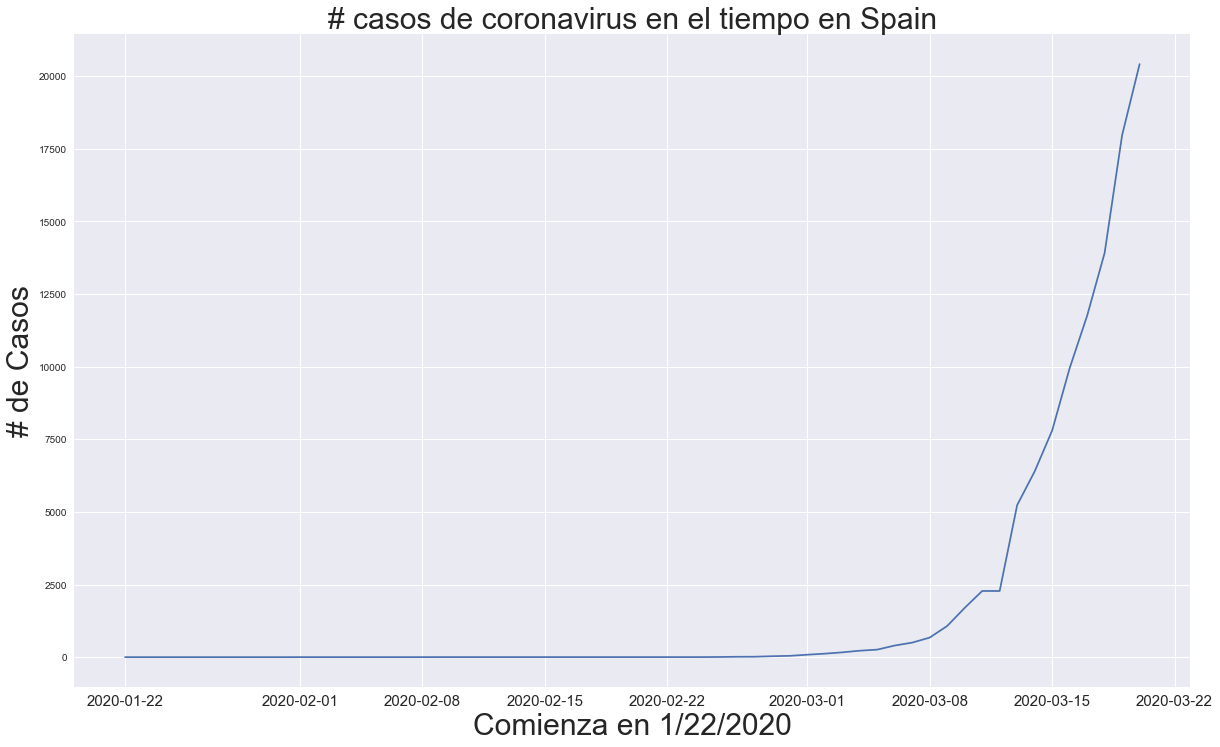

In [127]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_confirmed_y)
plt.title('# casos de coronavirus en el tiempo en {}'.format(pais_elegido), size=30)
plt.xlabel('Comienza en 1/22/2020', size=30)
plt.ylabel('# de Casos', size=30)
plt.xticks(size=15)
plt.show()

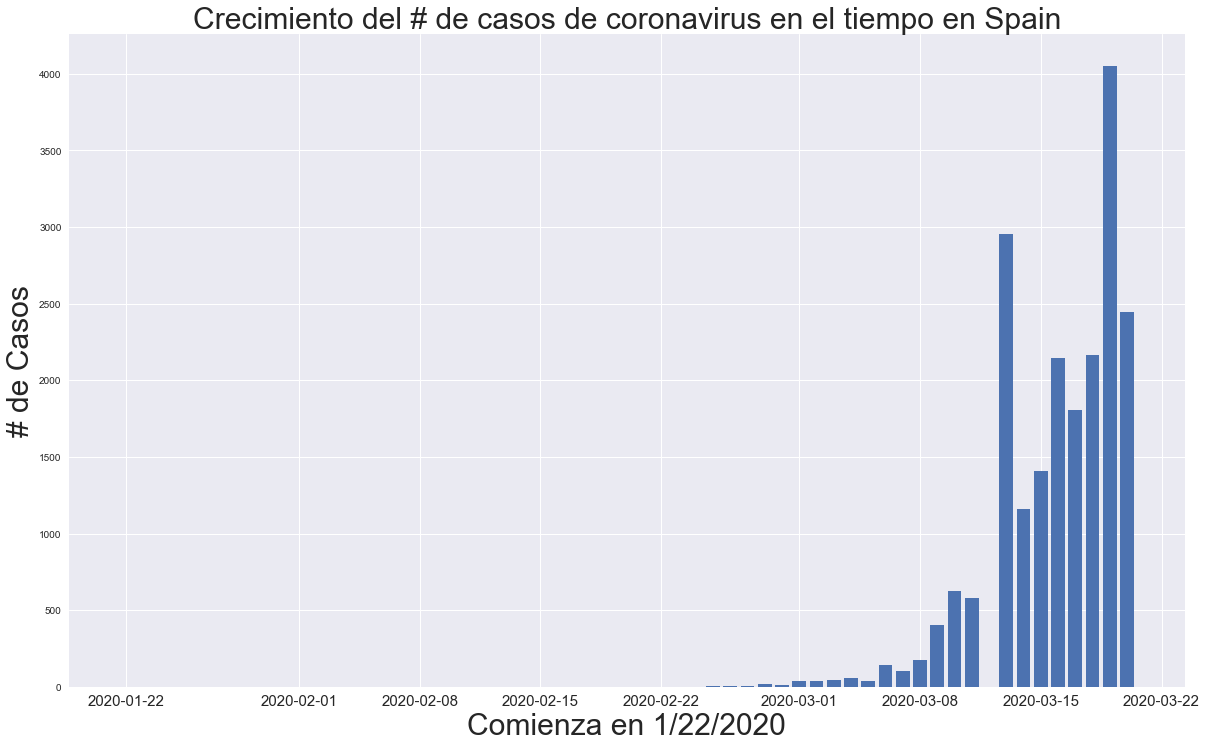

In [128]:
plt.figure(figsize=(20, 12))
plt.bar(x_values, esp_tasa_crecimiento)
plt.title('Crecimiento del # de casos de coronavirus en el tiempo en {}'.format(pais_elegido), size=30)
plt.xlabel('Comienza en 1/22/2020', size=30)
plt.ylabel('# de Casos', size=30)
plt.xticks(size=15)
plt.show()

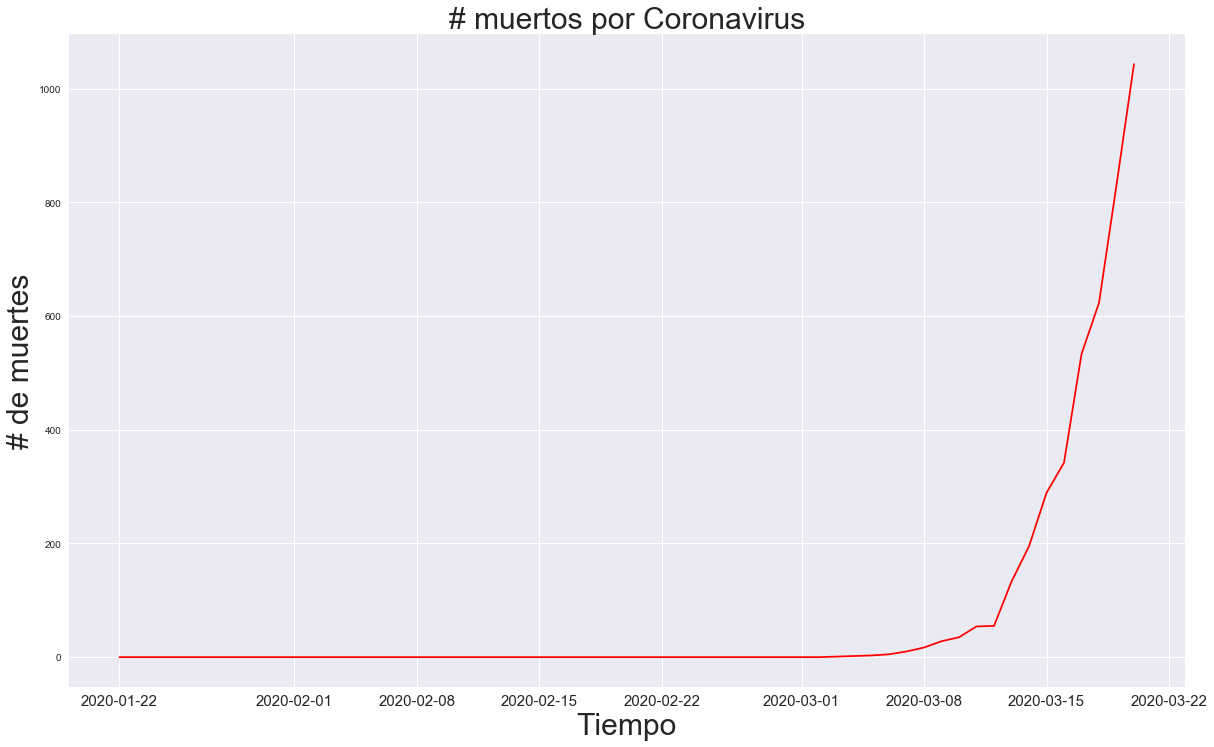

In [129]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_total_deaths, color='red')
plt.title('# muertos por Coronavirus', size=30)
plt.xlabel('Tiempo', size=30)
plt.ylabel('# de muertes', size=30)
plt.xticks(size=15)
plt.show()

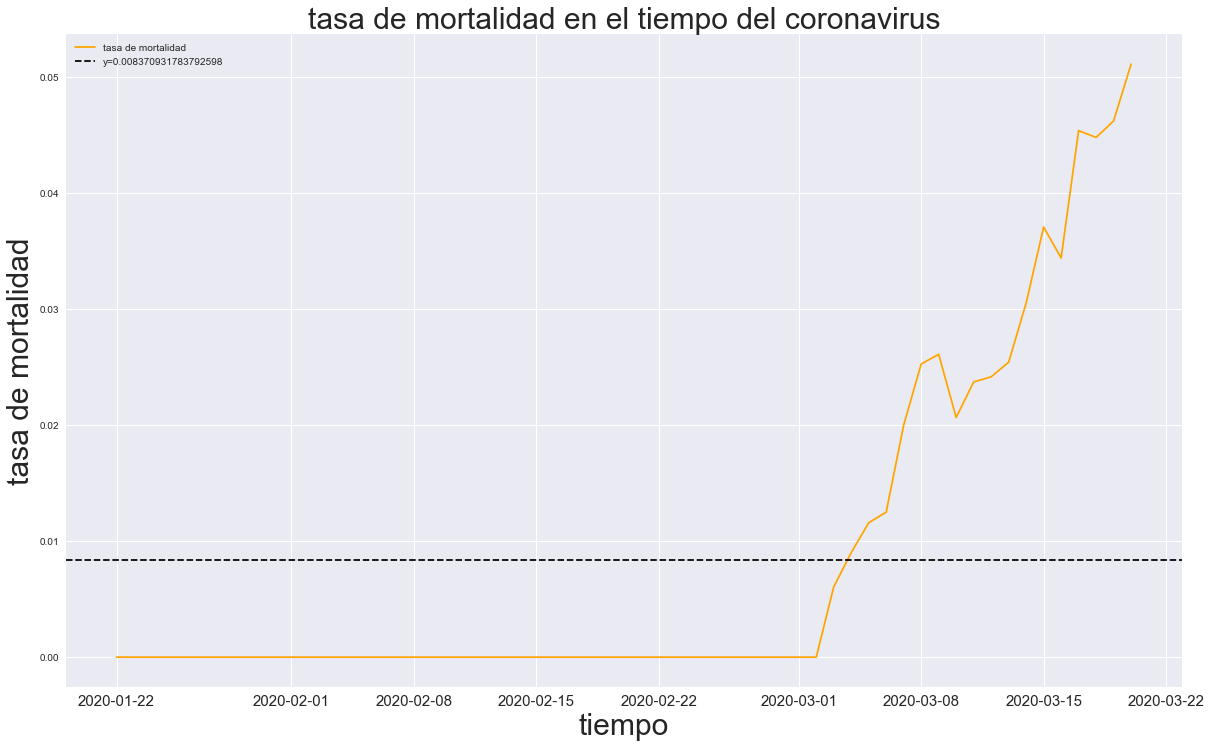

In [130]:
esp_mean_mortality_rate = np.mean(esp_mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_mortality_rate, color='orange')
plt.axhline(y = esp_mean_mortality_rate,linestyle='--', color='black')
plt.title('tasa de mortalidad en el tiempo del coronavirus', size=30)
plt.legend(['tasa de mortalidad', 'y='+str(esp_mean_mortality_rate)])
plt.xlabel('tiempo', size=30)
plt.ylabel('tasa de mortalidad', size=30)
plt.xticks(size=15)
plt.show()


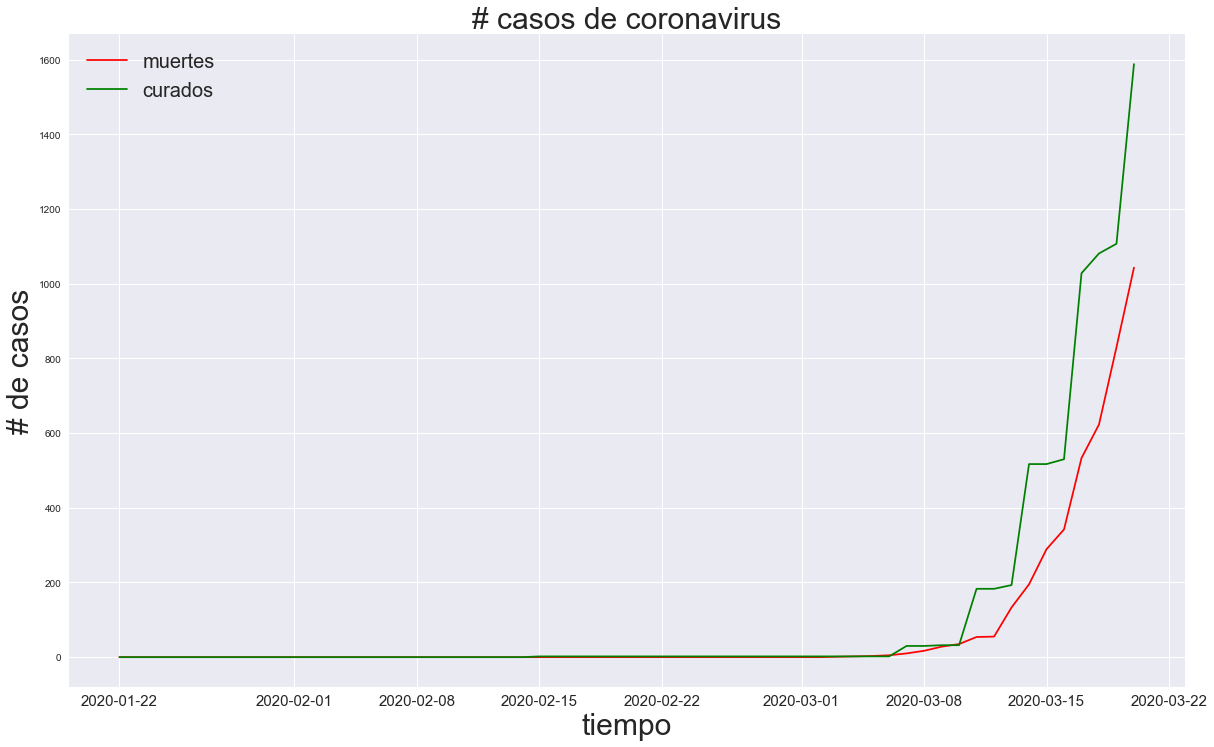

In [131]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_total_deaths, color='r')
plt.plot(x_values, esp_total_recovery, color='green')
plt.legend(['muertes', 'curados'], loc='best', fontsize=20)
plt.title('# casos de coronavirus', size=30)
plt.xlabel('tiempo', size=30)
plt.ylabel('# de casos', size=30)
plt.xticks(size=15)
plt.show()


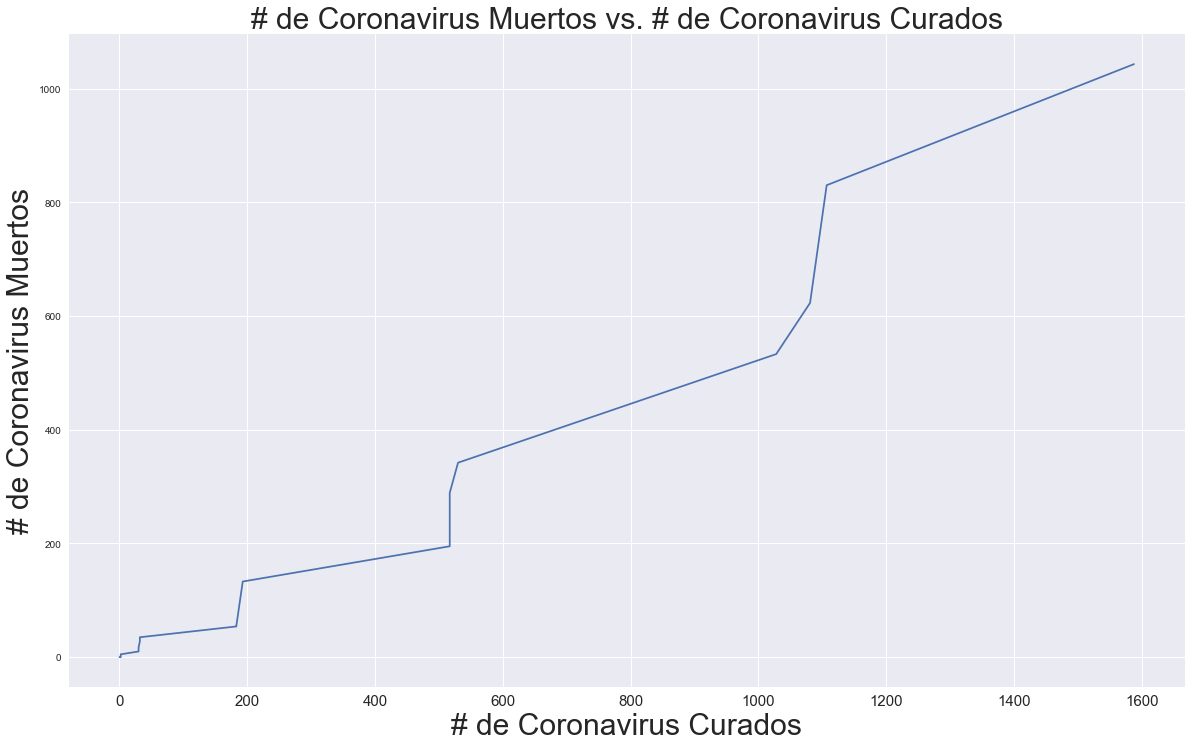

In [132]:
plt.figure(figsize=(20, 12))
plt.plot(esp_total_recovery, esp_total_deaths)
plt.title('# de Coronavirus Muertos vs. # de Coronavirus Curados', size=30)
plt.xlabel('# de Coronavirus Curados', size=30)
plt.ylabel('# de Coronavirus Muertos', size=30)
plt.xticks(size=15)
plt.show()

# Estudio global

Me quedo con los datos numéricos nada más, asi que cojo solo las col_fechas_ind.

In [69]:
confirmed = confirmed_df.loc[:, col_fechas_ind]
deaths = deaths_df.loc[:, col_fechas_ind]
recoveries = recoveries_df.loc[:, col_fechas_ind]

Creamos arrays  con todo

In [70]:
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

# totalizamos en un array los resultados
for i in col_fechas_ind:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)


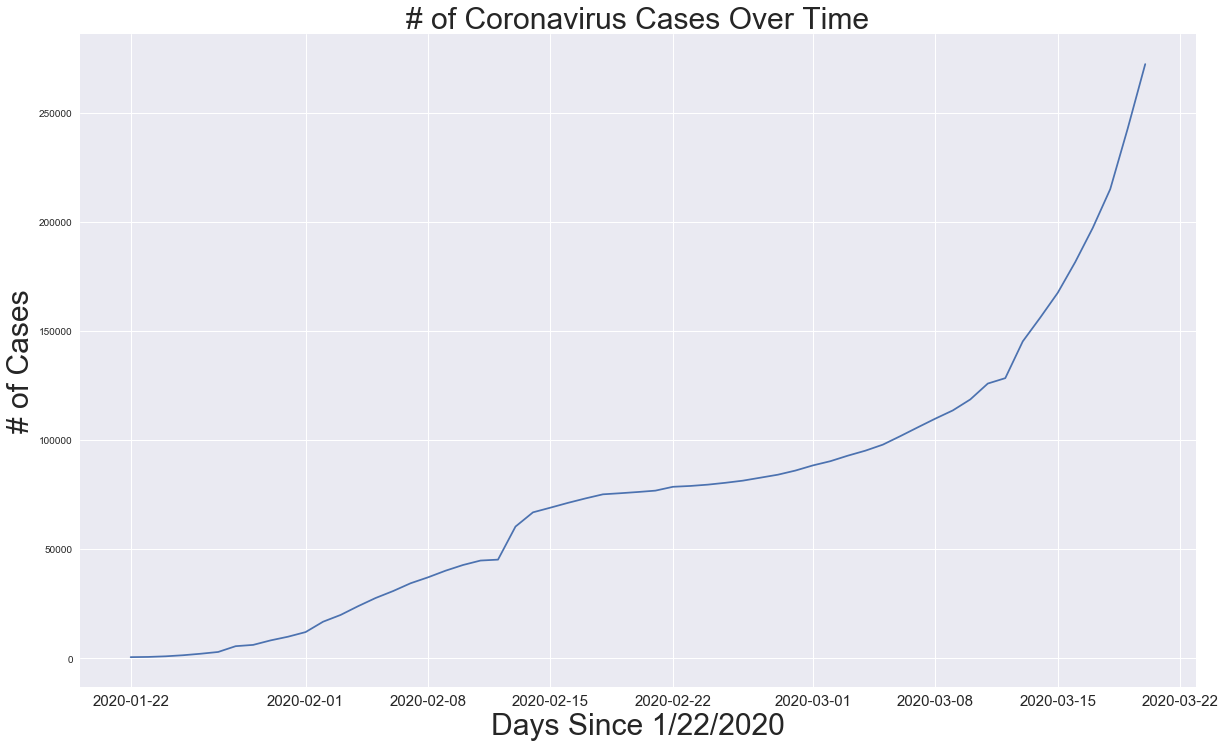

In [71]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=15)
plt.show()

Representaremos el númerode casos confirmados, recuperaciones, muertes y ratio de mortalidad a través del tiempo.

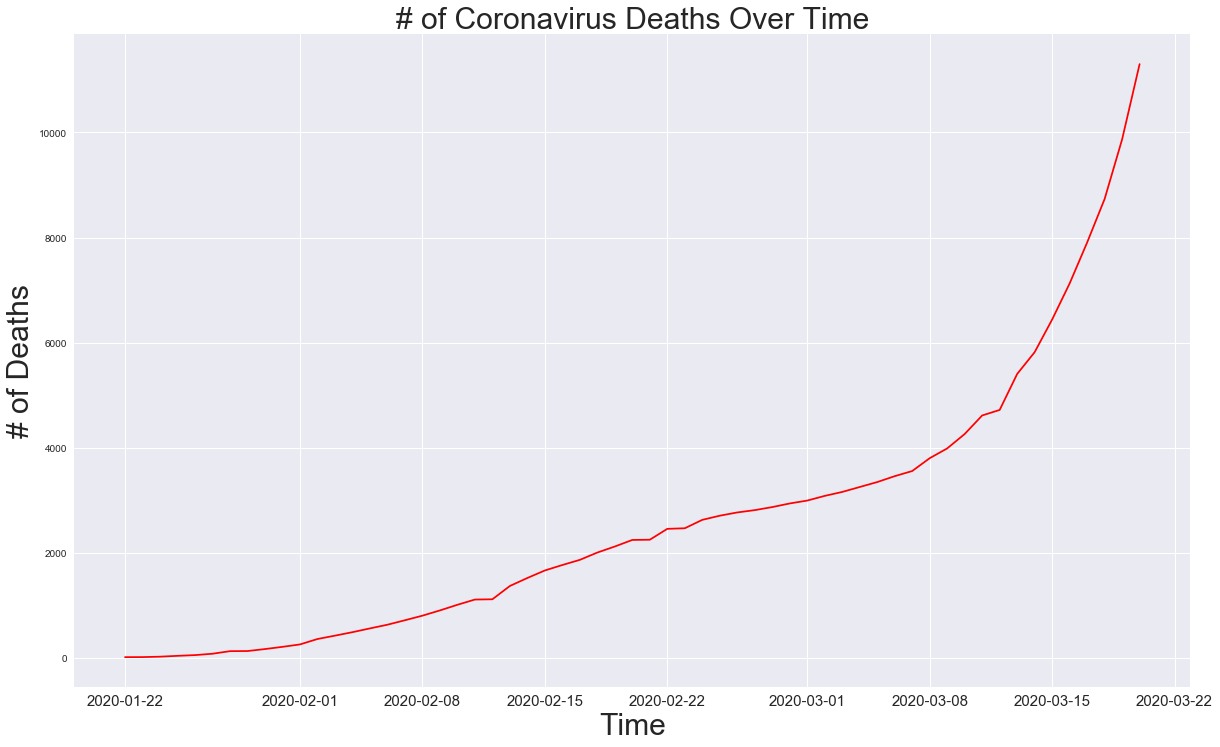

In [72]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, total_deaths, color='red')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Deaths', size=30)
plt.xticks(size=15)
plt.show()

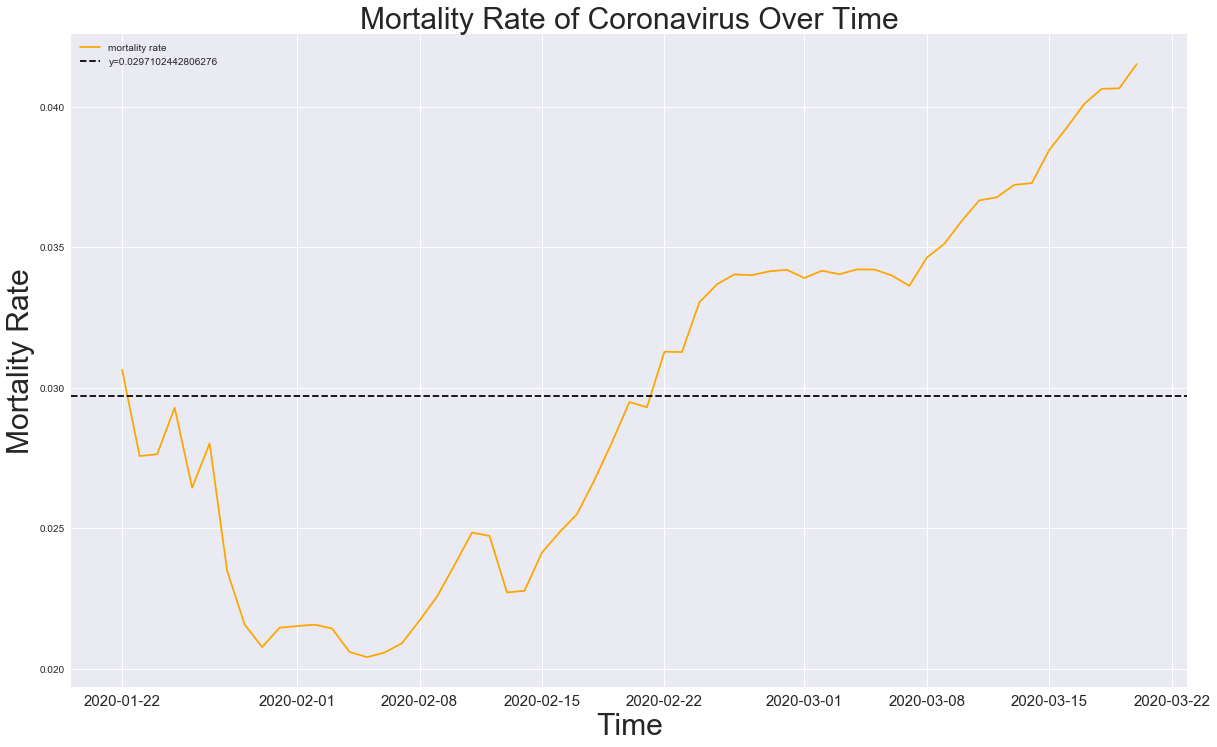

In [73]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(x_values, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.show()

Graphing the number of deaths and the number of recoveries

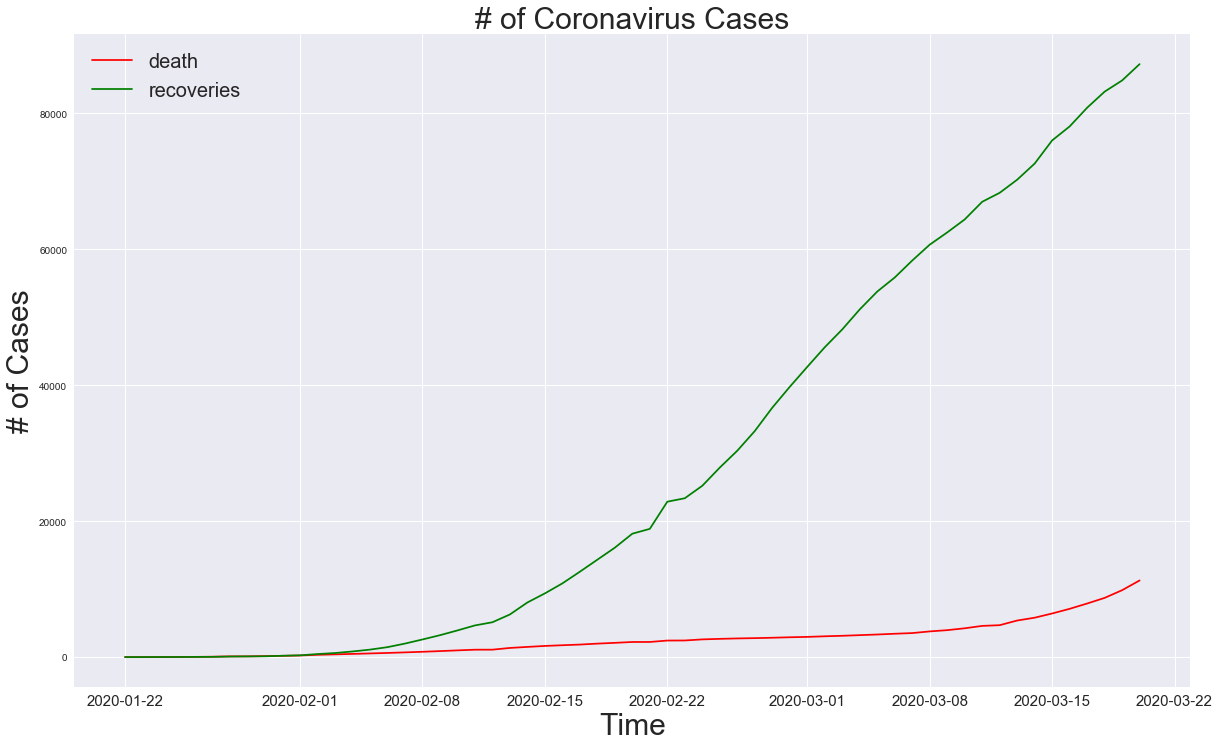

In [74]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, total_deaths, color='r')
plt.plot(x_values, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=15)
plt.show()





Plotting deaths vs recoveries

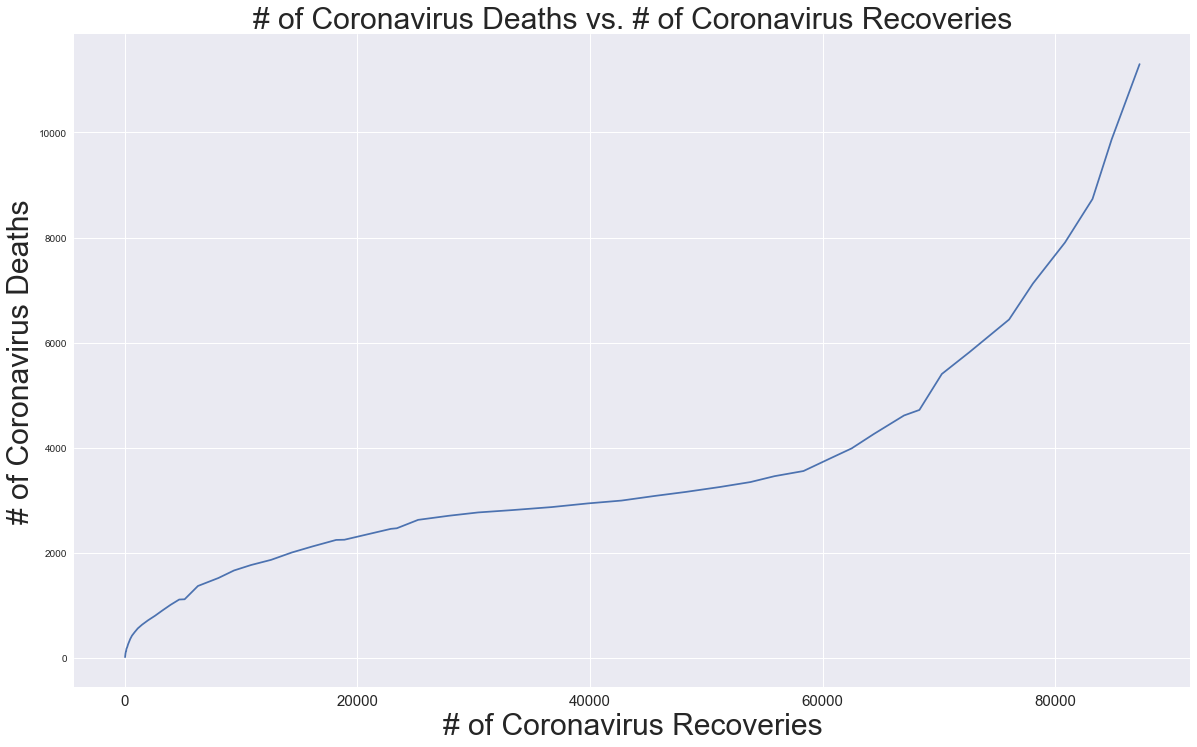

In [75]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
plt.xlabel('# of Coronavirus Recoveries', size=30)
plt.ylabel('# of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.show()

In [76]:
latest_confirmed = confirmed_df[col_fechas_ind[-1]]
latest_deaths = deaths_df[col_fechas_ind[-1]]
latest_recoveries = recoveries_df[col_fechas_ind[-1]]

Getting information about countries/regions that have confirmed coronavirus cases

In [77]:
unique_countries =  list(confirmed_df['Country/Region'].unique())

In [78]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_df['Country/Region']==unique_countries[i]].sum()

In [79]:
# number of cases per country/region
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
China: 81250 cases
Italy: 47021 cases
Spain: 20410 cases
Germany: 19848 cases
Iran: 19644 cases
US: 19100 cases
France: 12726 cases
Korea, South: 8652 cases
Switzerland: 5294 cases
United Kingdom: 4014 cases
Netherlands: 3003 cases
Austria: 2388 cases
Belgium: 2257 cases
Norway: 1914 cases
Sweden: 1639 cases
Denmark: 1337 cases
Malaysia: 1030 cases
Portugal: 1020 cases
Japan: 963 cases
Canada: 943 cases
Czechia: 833 cases
Brazil: 793 cases
Australia: 791 cases
Cruise Ship: 712 cases
Israel: 705 cases
Ireland: 683 cases
Pakistan: 501 cases
Greece: 495 cases
Luxembourg: 484 cases
Qatar: 470 cases
Finland: 450 cases
Chile: 434 cases
Poland: 425 cases
Iceland: 409 cases
Singapore: 385 cases
Indonesia: 369 cases
Ecuador: 367 cases
Turkey: 359 cases
Saudi Arabia: 344 cases
Slovenia: 341 cases
Thailand: 322 cases
Romania: 308 cases
Egypt: 285 cases
Bahrain: 285 cases
Estonia: 283 cases
Russia: 253 cases
India: 244 cases
Peru: 234 cases
Philippines: 230 ca

In [80]:
unique_provinces =  list(confirmed_df['Province/State'].unique())
# those are countries, which are not provinces/states.
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)

### Actualizando los datos
Con los últimos datos presentes preparamos varias gráficas agrupadas

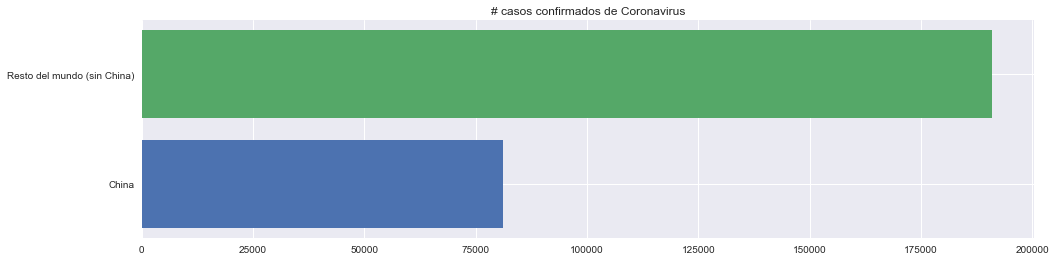

In [81]:
china_confirmed = latest_confirmed[confirmed_df['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 4))
plt.barh('China', china_confirmed)
plt.barh('Resto del mundo (sin China)', outside_mainland_china_confirmed)
plt.title('# casos confirmados de Coronavirus')
plt.show()


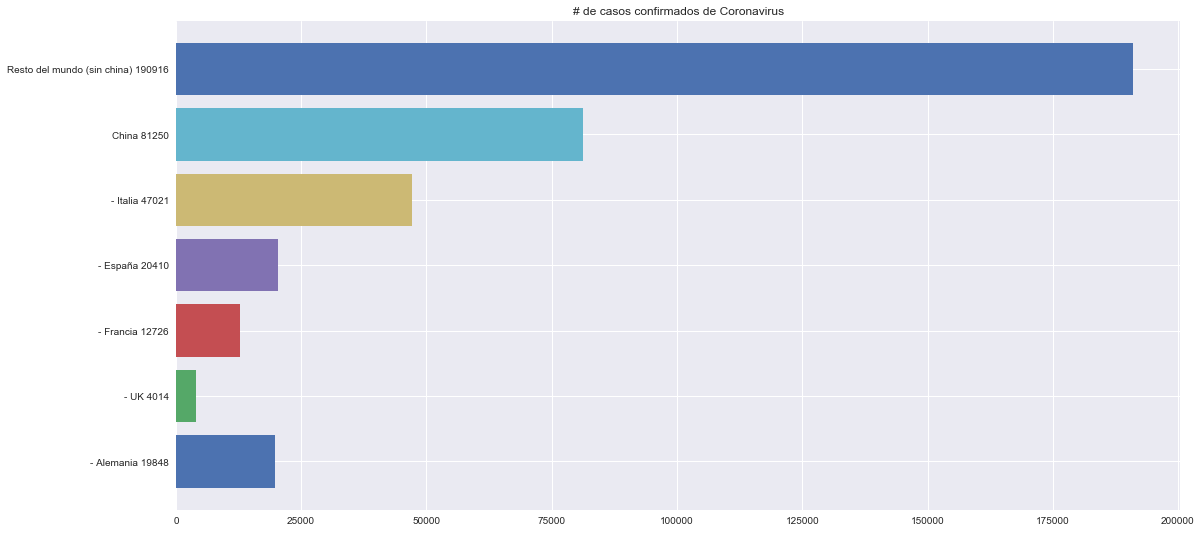

In [88]:
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
spain_confirmed = latest_confirmed[confirmed_df['Country/Region']=='Spain'].sum()
italy_confirmed = latest_confirmed[confirmed_df['Country/Region']=='Italy'].sum()
germany_confirmed = latest_confirmed[confirmed_df['Country/Region']=='Germany'].sum()
france_confirmed = latest_confirmed[confirmed_df['Country/Region']=='France'].sum()
united_kingdom_confirmed = latest_confirmed[confirmed_df['Country/Region']=='United Kingdom'].sum()
plt.figure(figsize=(18, 9))

plt.barh('- UK {}'.format(united_kingdom_confirmed),united_kingdom_confirmed)
plt.barh('- Alemania {}'.format(germany_confirmed), germany_confirmed)
plt.barh('- Francia {}'.format(france_confirmed), france_confirmed)
plt.barh('- España {}'.format(spain_confirmed), spain_confirmed)
plt.barh('- Italia {}'.format(italy_confirmed), italy_confirmed)
plt.barh('China {}'.format(china_confirmed), china_confirmed)
plt.barh('Resto del mundo (sin china) {}'.format(outside_mainland_china_confirmed), outside_mainland_china_confirmed)

plt.title('# de casos confirmados de Coronavirus')
plt.show()

## Representaciones visuales para el mundo (barras y tartas)

In [186]:
# Mostramos los diez mayores, resto agrupamos
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

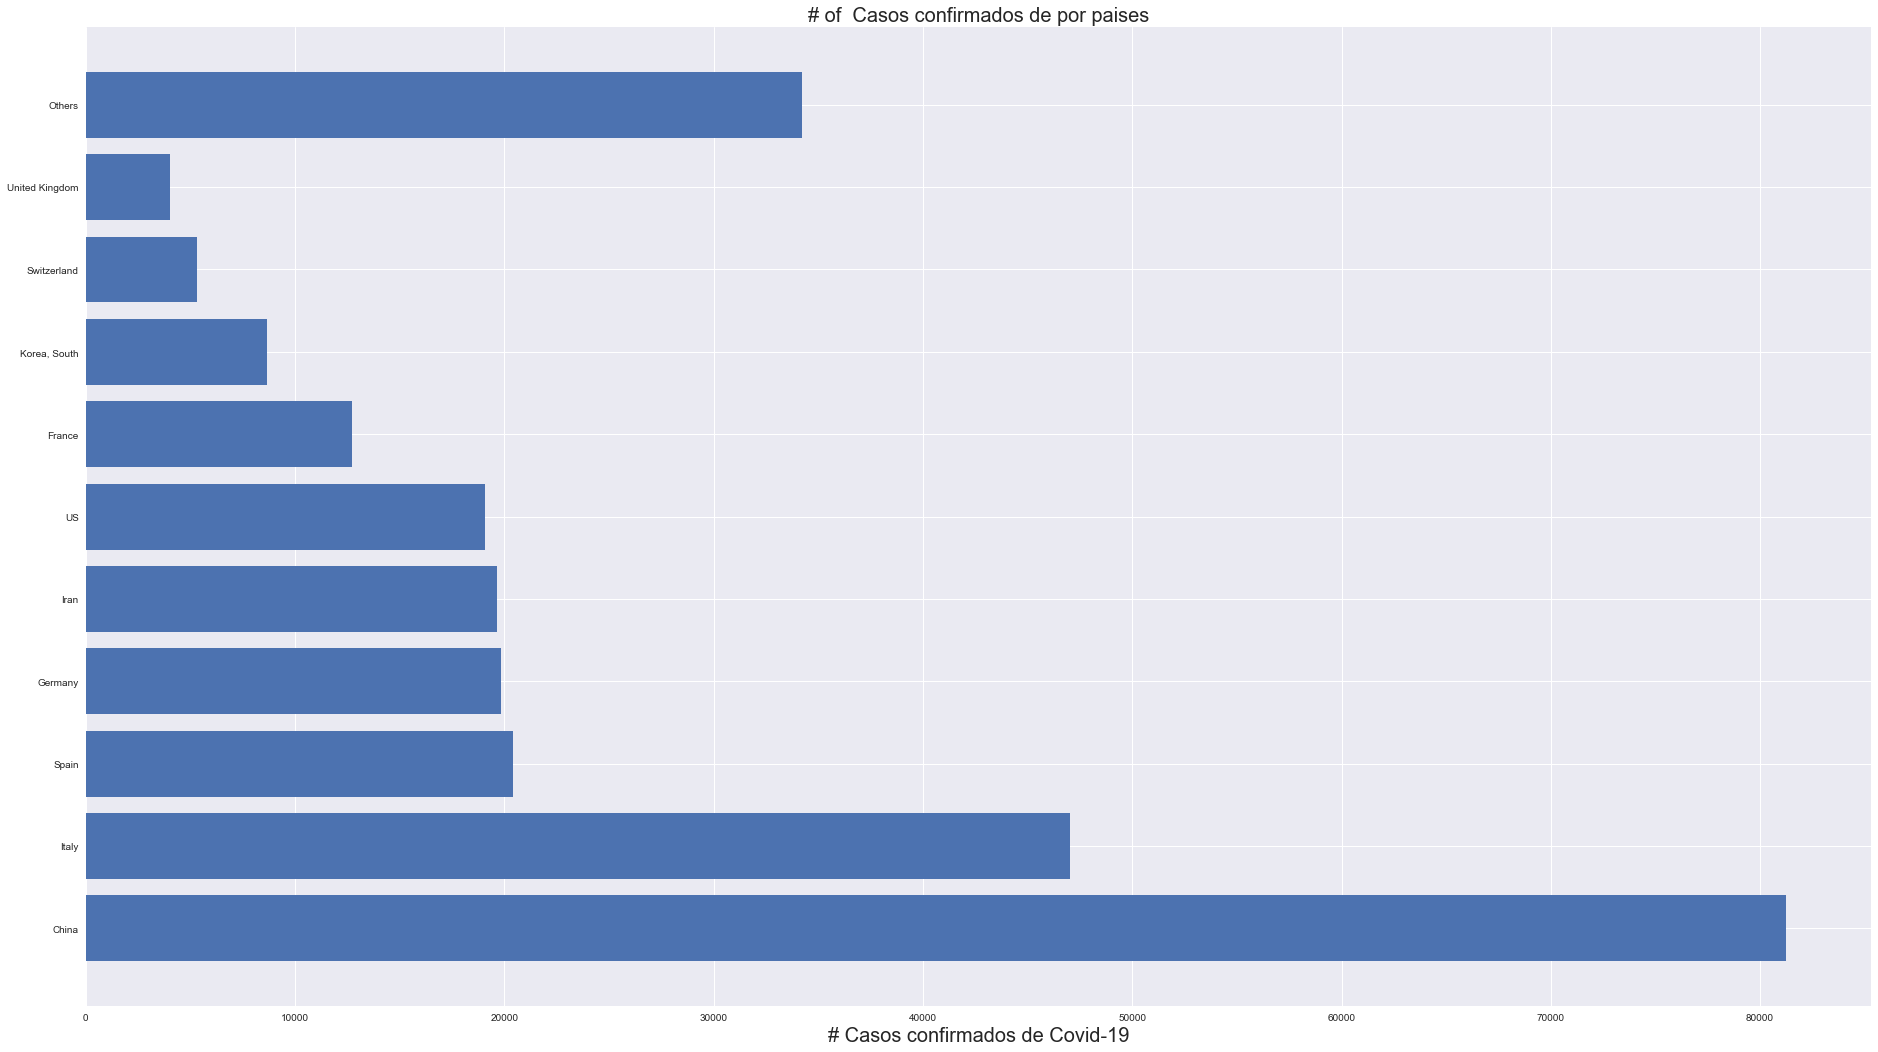

In [187]:
plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('# of  Casos confirmados de por paises', size=20)
plt.xlabel('# Casos confirmados de Covid-19', size=20)
plt.show()

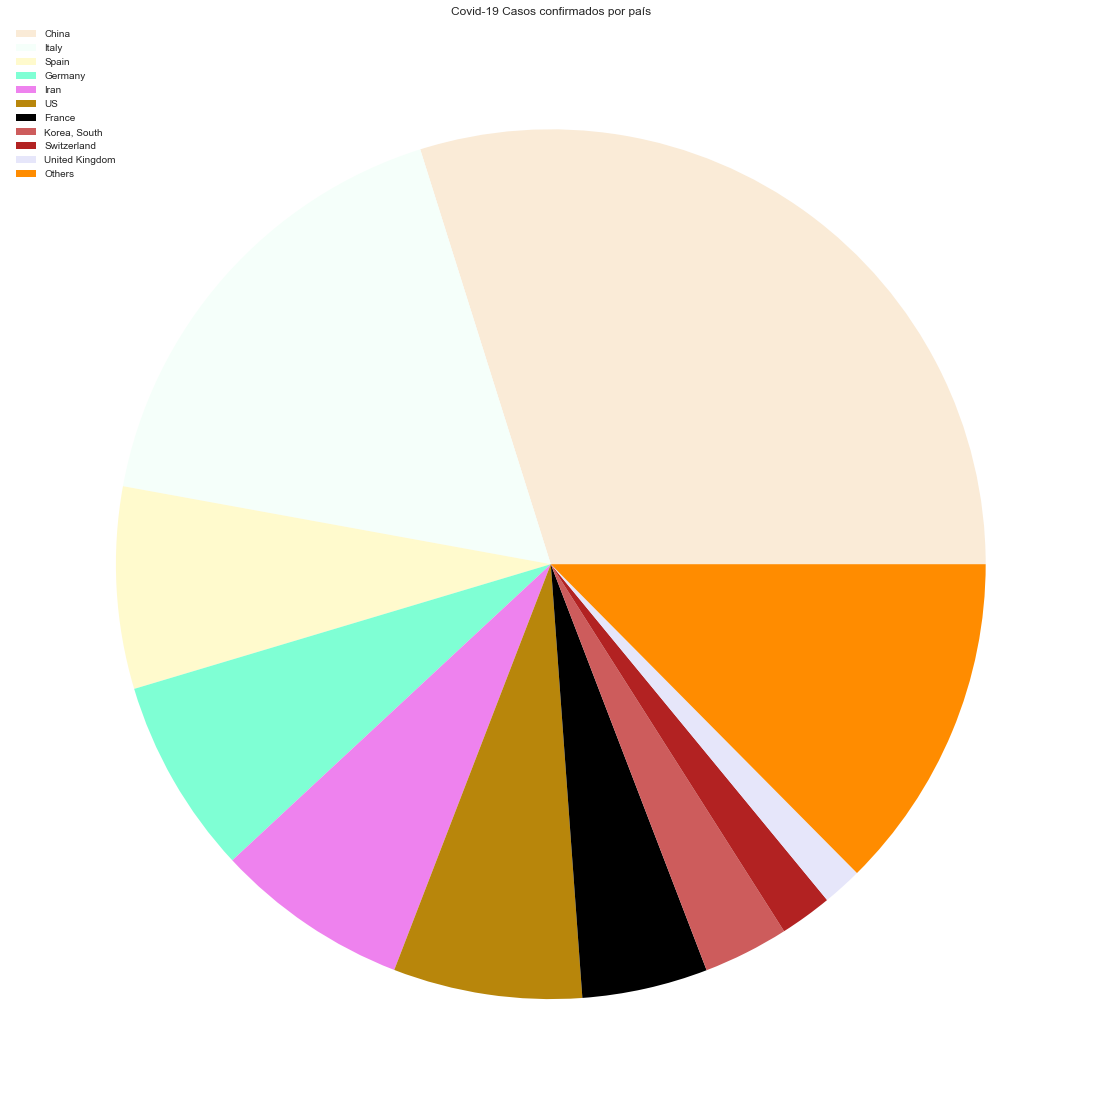

In [188]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Casos confirmados por país')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

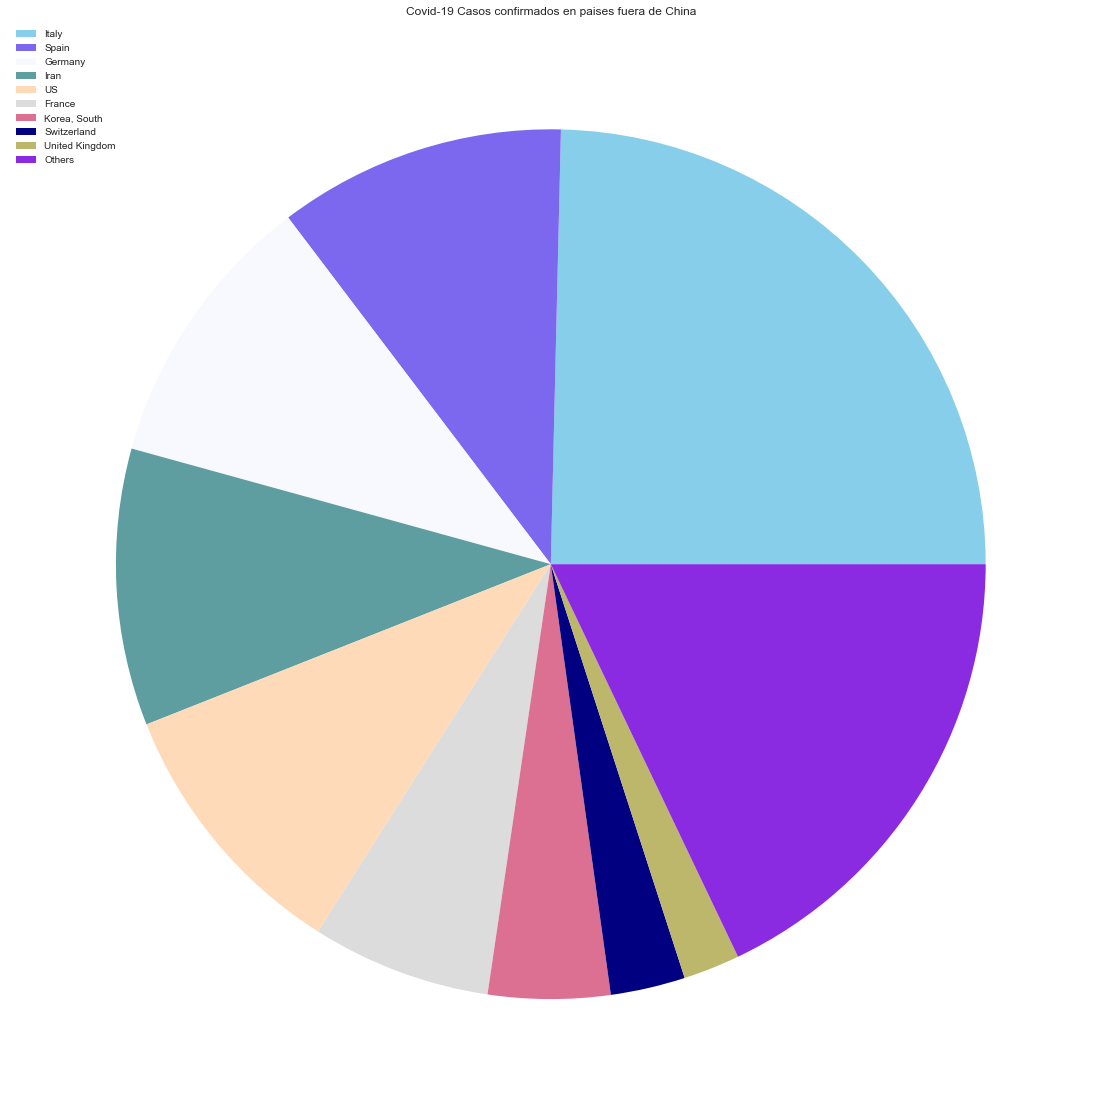

In [189]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Casos confirmados en paises fuera de China')
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best')
plt.show()

In [190]:
us_regions = list(confirmed_df[confirmed_df['Country/Region']=='US']['Province/State'].unique())
us_confirmed_cases = []
no_cases = [] 
for i in us_regions:
    cases = latest_confirmed[confirmed_df['Province/State']==i].sum()
    if cases > 0:
        us_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    us_regions.remove(i)

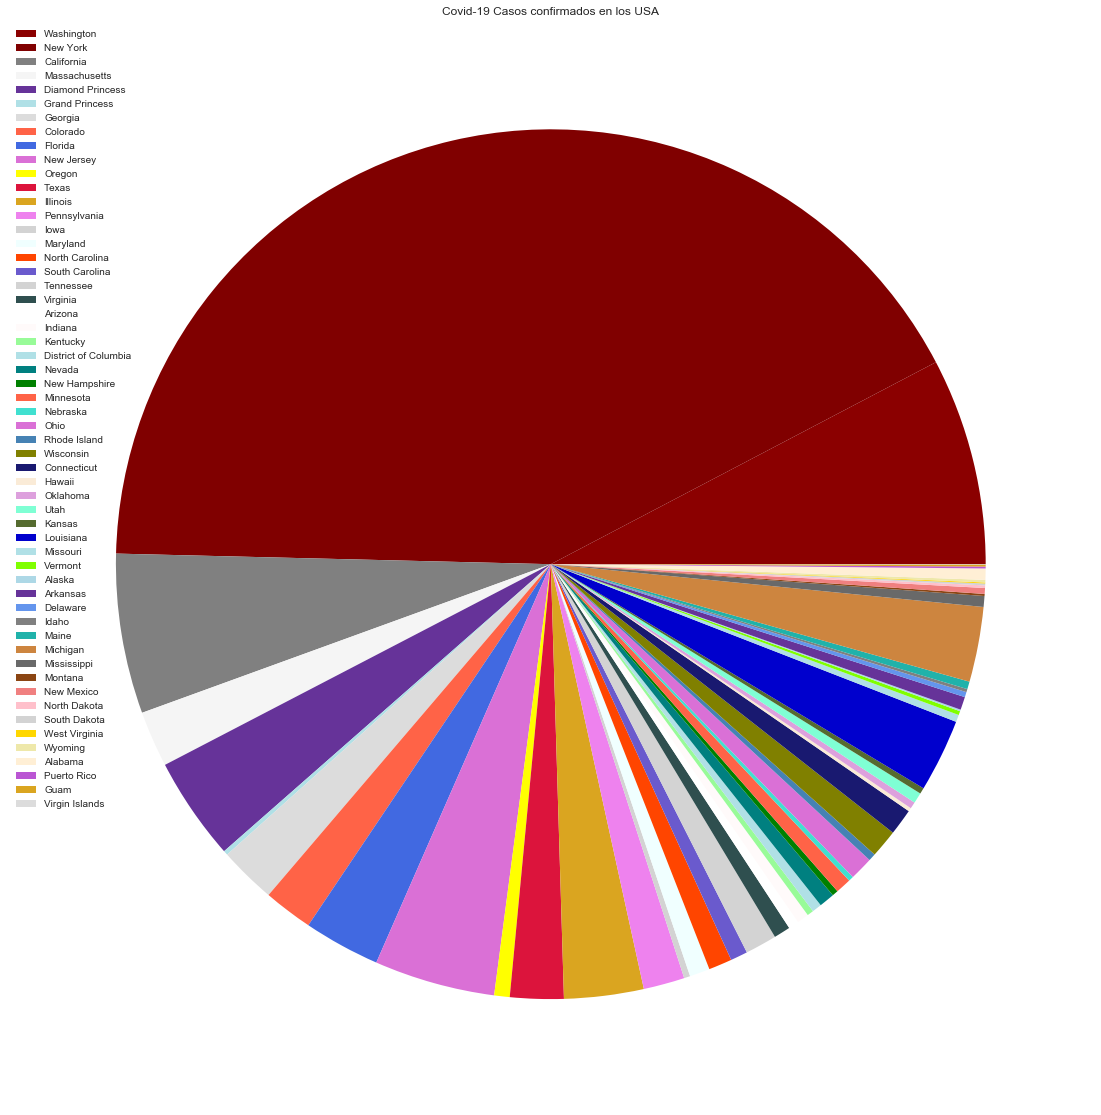

In [191]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Casos confirmados en los USA')
plt.pie(us_confirmed_cases, colors=c)
plt.legend(us_regions, loc='best')
plt.show()